In [1]:
import rasterio
from rasterio.mask import mask

import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 깨짐 방지

# 환경 데이터 마켓 (지형 분석도 (지형 경사도))
- https://www.bigdata-environment.kr/user/data_market/detail.do?id=c0a2e080-313c-11ea-adf5-336b13359c97#!

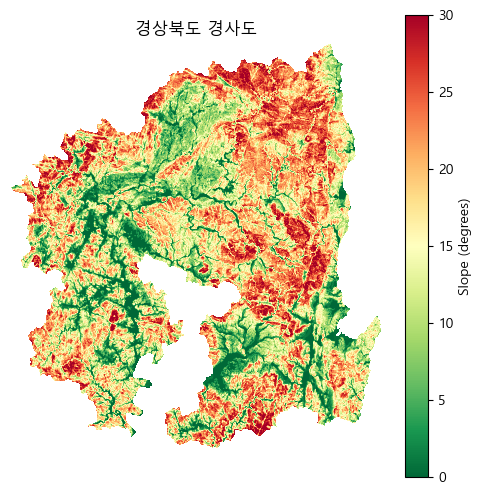

In [3]:
# 1. GeoTIFF 열기
with rasterio.open("./Data/slope_gb.tif") as src:
    # 2. 경상북도 경계 shapefile 읽기 (좌표계 맞춰주기)
    gb = gpd.read_file("./Data/경상북도_시도/경상북도.shp").to_crs(src.crs)

    # 3. geometry만 추출
    gb_geom = gb.geometry.values

    # 4. 경상북도 영역으로 자르기 (마스킹)
    slope_clipped, slope_transform = mask(src, gb_geom, crop=True)
    slope_clipped = slope_clipped[0]  # 첫 번째 밴드만 사용
    slope_meta = src.meta

# 5. NoData 마스킹
nodata = slope_meta.get('nodata', -9999)
slope_clipped = np.where(slope_clipped == nodata, np.nan, slope_clipped)

# 6. 시각화
plt.figure(figsize=(6, 6))
plt.imshow(slope_clipped, cmap='RdYlGn_r', vmin=0, vmax=30)
plt.colorbar(label='Slope (degrees)')
plt.title("경상북도 경사도")
plt.axis('off')
plt.show()